Fitting model on a small sub-sample of the data
done in 0.398s.
Predicting color indices on the full image (k-means)
done in 0.151s.
Predicting color indices on the full image (random)
done in 0.155s.


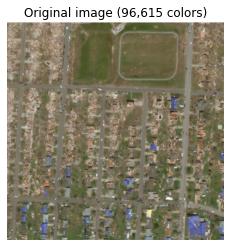

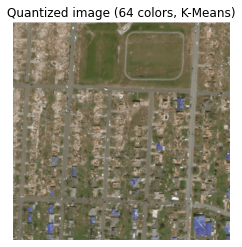

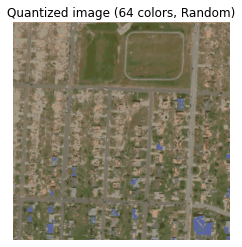

In [4]:
import cv2
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image

n_colors = 64

# Load the photo
oilspill = Image.open('b3.png')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
oilspill = np.array(oilspill, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(oilspill.shape)
image_array = np.reshape(oilspill, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(oilspill)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

img1_output = recreate_image(kmeans.cluster_centers_, labels, w, h)
img2_output = recreate_image(codebook_random, labels_random, w, h)

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

kmean_filename = "b3_kmean.png"
kmean_output = Image.fromarray((img1_output * 255).astype(np.uint8), "RGBA");
kmean_output.save(kmean_filename)
random_filename = "b3_random.png"
random_output = Image.fromarray((img2_output * 255).astype(np.uint8), "RGBA");
random_output.save(random_filename)

Fitting model on a small sub-sample of the data
done in 0.461s.
Predicting color indices on the full image (k-means)
done in 0.177s.
Predicting color indices on the full image (random)
done in 0.160s.


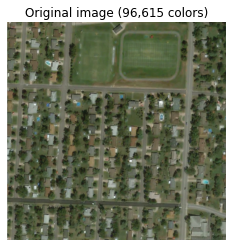

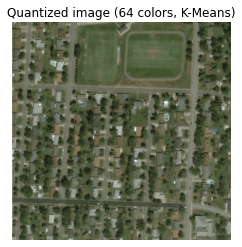

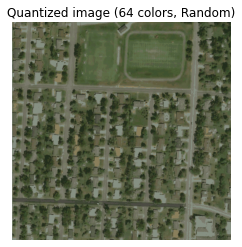

In [2]:
import cv2
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from PIL import Image

n_colors = 64

# Load the photo
oilspill = Image.open('a3.png')

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
oilspill = np.array(oilspill, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(oilspill.shape)
image_array = np.reshape(oilspill, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))


codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(oilspill)

plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

img1_output = recreate_image(kmeans.cluster_centers_, labels, w, h)
img2_output = recreate_image(codebook_random, labels_random, w, h)

plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

kmean_filename = "a3_kmean.png"
kmean_output = Image.fromarray((img1_output * 255).astype(np.uint8), "RGBA");
kmean_output.save(kmean_filename)
random_filename = "a3_random.png"
random_output = Image.fromarray((img2_output * 255).astype(np.uint8), "RGBA");
random_output.save(random_filename)